In [ ]:
#reference:https://www.kaggle.com/arbazkhan971/anomaly-detection

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
gtrain = pd.read_csv('wdata/Train.csv')
gtrain.iloc[0:2,420:435]

,feature_421,feature_422,feature_423,feature_424,feature_425,feature_426,feature_427,feature_428,feature_429,feature_430,feature_431,feature_432,feature_433,feature_434,feature_435
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = pd.read_csv('wdata/wn3train.csv')
train.head()

,feature_1,feature_2,feature_3,Class
0,100,160,1.6000,0
1,20,83,4.1500,0
2,99,150,1.5151,0
3,40,40,1.0000,0
4,12,234,19.5000,0


In [ ]:
test = pd.read_csv("wdata/wn3test.csv")
test.head(2)

,feature_1,feature_2,feature_3
0,1,1,2.0000
1,46,96,2.0869


In [ ]:
train["Class"].value_counts()

0    1620
1     143
Name: Class, dtype: int64

(array([1620.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

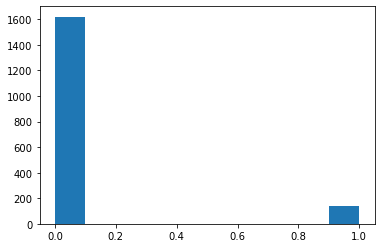

In [ ]:
plt.hist(train["Class"])

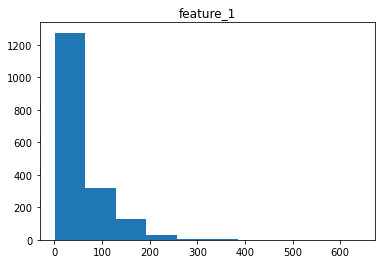

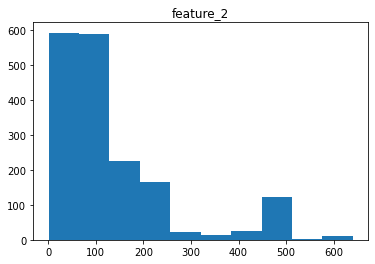

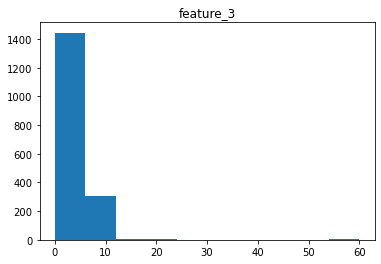

In [ ]:
for i in train.columns[:3]:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

# Resampling the Data

Here we will first remove a test set from our original Dataset and then  resample our train dataset using SMOTE. This will give us a Datset which is untouched and on which we can test our final model. We will also create a validation dataset from our training to use cross validation techniques.

In [ ]:
Sm = SMOTE()
X = train.drop("Class", axis = 1)
y = train["Class"]

Splitting the original Dataset to create a Test set

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, stratify = y)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1586, 3), (177, 3), (1586,), (177,))

Resampling the Training Dataset (oversampling is used) to create a balance in the train set.

In [ ]:
x_train, y_train = Sm.fit_resample(X_train, y_train)
x_train.shape, y_train.shape, y_train.value_counts()

((2914, 3),
 (2914,),
 1    1457
 0    1457
 Name: Class, dtype: int64)

In [ ]:
x_train_re, x_valid_re, y_train_re, y_valid_re = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [ ]:
#pip install catboost

Training a simple Classifier using Random Forest and Catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import catboost
from sklearn.metrics import auc, roc_curve

In [ ]:
def metric(preds, target):
    fpr, tpr, thresholds = roc_curve(target, preds)
    return auc(fpr, tpr)

In [ ]:
def fprm(preds, target):
    fpr, tpr, thresholds = roc_curve(target, preds)
    return fpr

In [ ]:
Rf = RandomForestClassifier()
model_Rf = Rf.fit(x_train_re, y_train_re)
preds = model_Rf.predict(x_valid_re)
print(metric(preds, y_valid_re))
#fprmz=fprm(preds,x_valid_re)
print('False Positivity Rate is')
fprm(preds, y_valid_re)

0.8253424657534247
False Positivity Rate is


array([0.        , 0.10958904, 1.        ])

In [ ]:
len(preds)

292

In [ ]:
train_cy = train.copy()

In [ ]:
rndpermc = np.random.permutation(train_cy.shape[0])

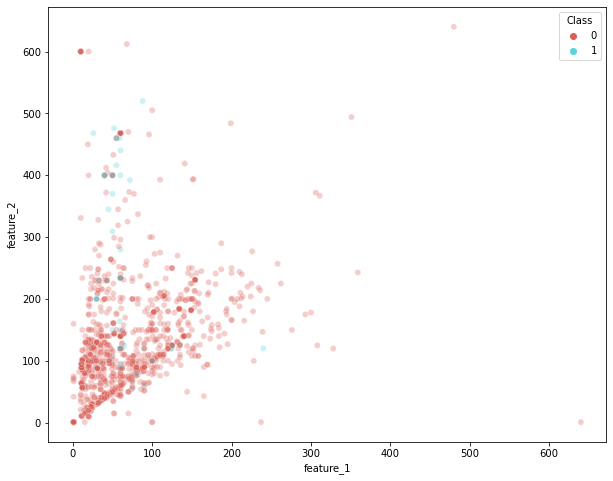

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="feature_1", y="feature_2",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data= train_cy.loc[rndpermc,:],
    legend="full",
    alpha=0.3
)

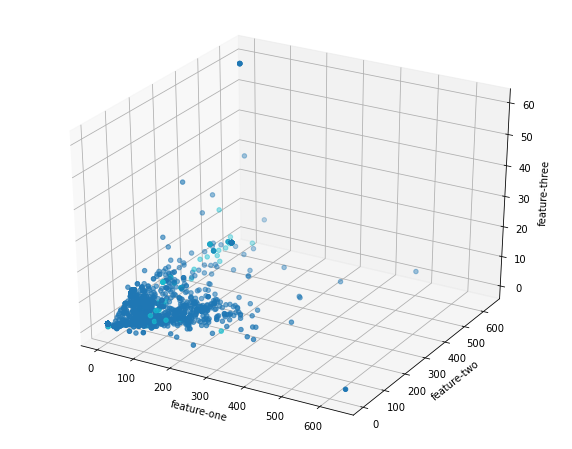

In [ ]:
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(
    xs=train_cy.loc[rndpermc,:]["feature_1"], 
    ys=train_cy.loc[rndpermc,:]["feature_2"], 
    zs=train_cy.loc[rndpermc,:]["feature_3"], 
    c=train_cy.loc[rndpermc,:]["Class"], 
    cmap='tab10'
)
ax.set_xlabel('feature-one')
ax.set_ylabel('feature-two')
ax.set_zlabel('feature-three')
plt.show()

# Normal Approach

In [ ]:
train = pd.read_csv('wdata/wn3train.csv')
train.head(2)

,feature_1,feature_2,feature_3,Class
0,100,160,1.60,0
1,20,83,4.15,0


lets check if there are any duplicate columns present in the Dataset

In [ ]:
train = train.T.drop_duplicates().T

In [ ]:
train.shape

(1763, 4)

Lets check if the number of unique values in the dataset is only 1 and if that is the case just delete it.

/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

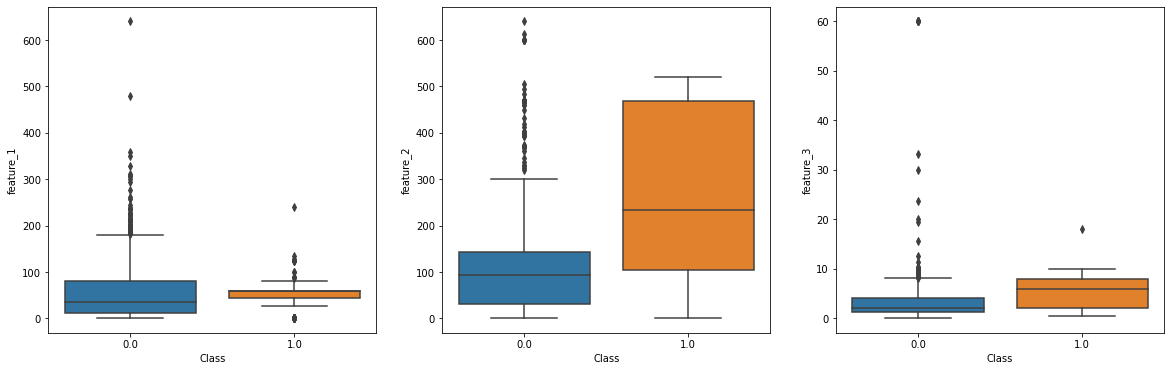

In [ ]:
plt.rcParams['figure.figsize'] = 20,6
plt.subplot(131)
sns.boxplot(train["Class"], train["feature_1"])
plt.subplot(132)
sns.boxplot(train["Class"], train["feature_2"])
plt.subplot(133)
sns.boxplot(train["Class"], train["feature_3"])


In [ ]:
df = pd.DataFrame((train == 0).astype(int).sum(axis=0))

In [ ]:
all_zero = df[df[0]>1761].index

train.drop(all_zero,axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1763 non-null   float64
 1   feature_2  1763 non-null   float64
 2   feature_3  1763 non-null   float64
 3   Class      1763 non-null   float64
dtypes: float64(4)
memory usage: 55.2 KB


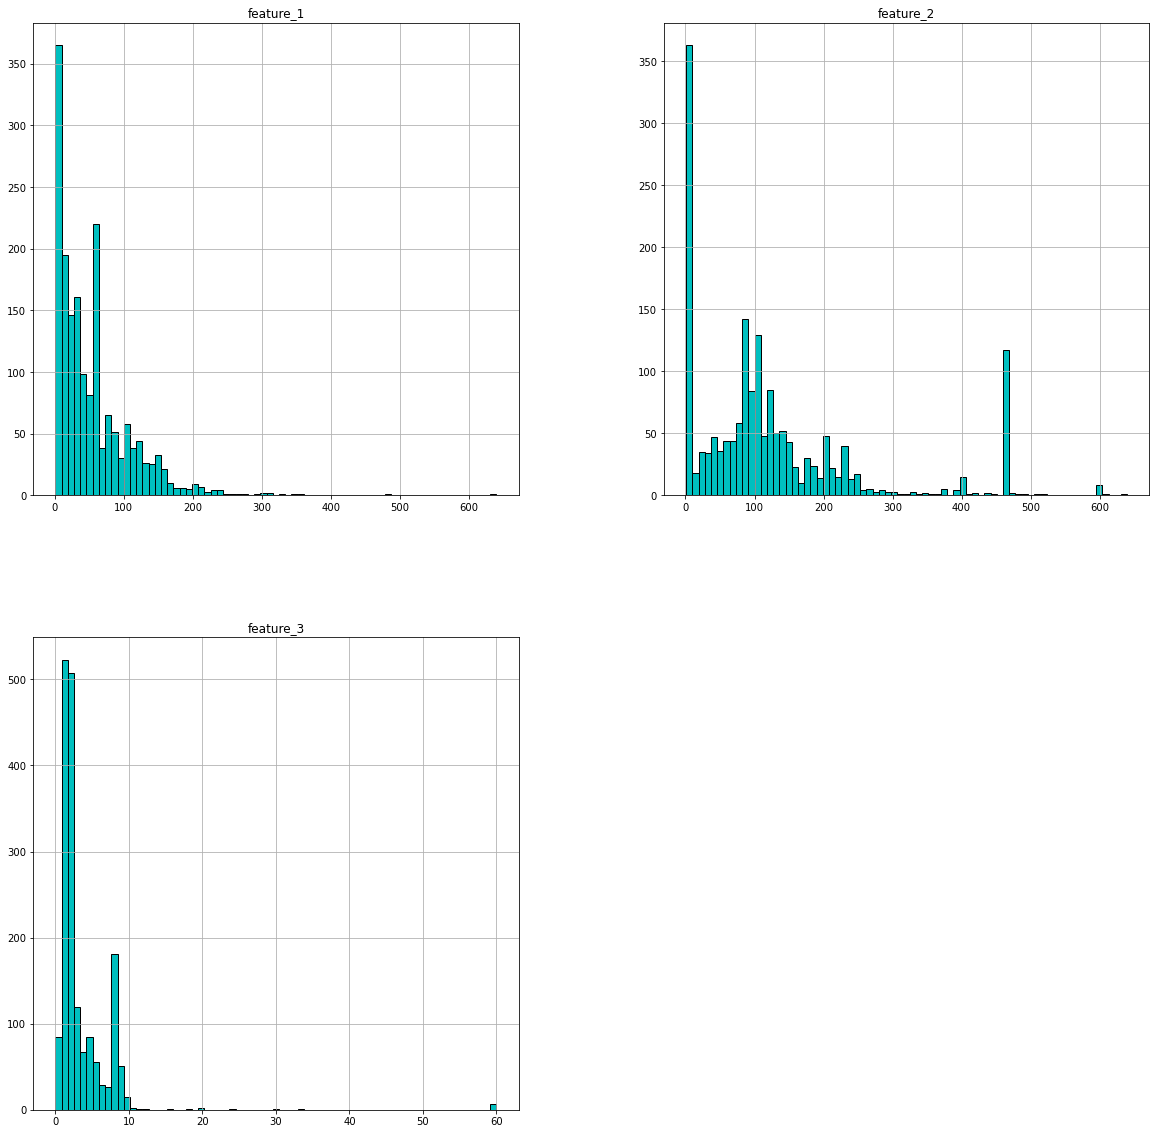

In [ ]:
train_hist = train.drop('Class', 1)
train_hist.hist(figsize=(20,20), bins = 71, color = "c", edgecolor='black')
plt.show()

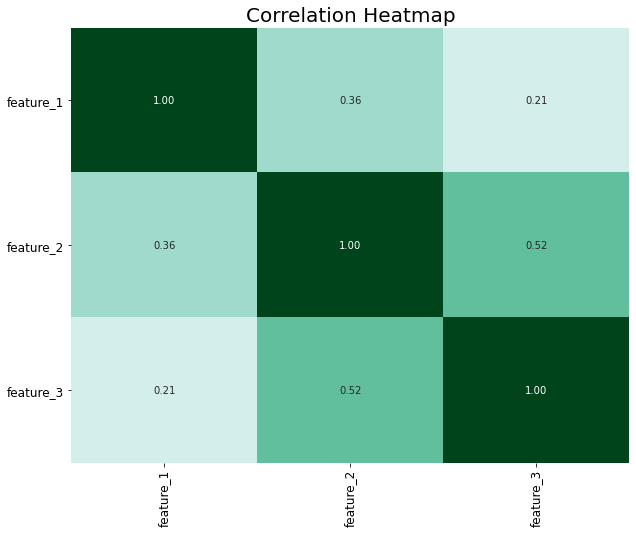

In [ ]:
corr = train_hist.corr()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
    
# plot the heatmap
plt.figure(figsize = (10, 8))

sns.heatmap(corr.abs(), cmap='BuGn', cbar=False, vmin=0, vmax=1, annot=True, fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [ ]:
train.head(2)

,feature_1,feature_2,feature_3,Class
0,100.0,160.0,1.60,0.0
1,20.0,83.0,4.15,0.0


Building the model

In [ ]:
X = train.drop("Class", axis = 1)
y = train["Class"]

X_train, X_valid , y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
modelxc = XGBClassifier(silent=True,
                      booster = 'gbtree',
                      scale_pos_weight=5,
                      learning_rate=0.01,  
                      colsample_bytree = 0.7,
                      subsample = 0.5,
                      max_delta_step = 3,
                      reg_lambda = 2,
                     objective='binary:logistic',
                      
                      n_estimators=818, 
                      max_depth=8,
                     )

In [ ]:
%%time
eval_set = [(X_valid, y_valid)]
eval_metric = ["logloss"]
modelxc.fit(X_train, y_train,early_stopping_rounds=50, eval_metric=eval_metric, eval_set=eval_set)

[15:00:11] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.68739
Will train until validation_0-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.68167
[2]	validation_0-logloss:0.67588
[3]	validation_0-logloss:0.67005
[4]	validation_0-logloss:0.66504
[5]	validation_0-logloss:0.65967
[6]	validation_0-logloss:0.65458
[7]	validation_0-logloss:0.64989
[8]	validation_0-logloss:0.64491
[9]	validation_0-logloss:0.63984
[10]	validation_0-logloss:0.63541
[11]	validation_0-logloss:0.63059
[12]	validation_0-logloss:0.62616
[13]	validation_0-logloss:0.62193
[14]	validation_0-logloss:0.61797
[15]	validation_0-logloss:0.61363
[16]	validation_0-logloss:0.60955
[17]	validation_0-logloss:0.60508
[18]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=3, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=818, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=5, silent=True,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

Evaluating the model

In [ ]:
predictions = modelxc.predict_proba(X_valid)[:, -1]

score = roc_auc_score(y_valid, predictions)
score

0.8646232439335888

In [ ]:
predcs = modelxc.predict(X_valid)
dfx=pd.DataFrame(predcs, columns=['Pred'])
dfx.value_counts()

Pred
0.0     307
1.0      46
dtype: int64

In [ ]:
y_pred_iso=predcs
y_test=y_valid

In [ ]:
from sklearn.metrics import accuracy_score,average_precision_score,recall_score,f1_score,confusion_matrix

print('accuracy score', accuracy_score(y_pred_iso, y_test))
cmiso = confusion_matrix(y_pred_iso, y_test)
print('precision_score', average_precision_score(y_pred_iso, y_test))
print('recall_score', recall_score(y_pred_iso, y_test))
print('f1_score',f1_score(y_pred_iso,y_test))

accuracy score 0.8838526912181303
precision_score 0.29879465366466906
recall_score 0.3695652173913043
f1_score 0.4533333333333333


In [ ]:
tn, fp, fn, tp = cmiso.ravel()

In [ ]:
fpr=fp/(tn+fp)
fpr

0.03908794788273615

## test with generated sample data

,timestamp,feature_1,feature_2,feature_3,Actual_Class
0,2019-01-01T00:00:04Z,100,312,52.0,1
1,2019-01-02T17:59:11Z,100,160,1.6,0


In [ ]:
wy_test=wtest['Actual_Class']

In [ ]:
wtest.drop(['timestamp','Actual_Class'],axis=1,inplace=True)

In [ ]:
wtest.head()

,feature_1,feature_2,feature_3
0,100,312,52.0000
1,100,160,1.6000
2,20,83,4.1500
3,1200,90,2.0000
4,36,41,1.1388


In [ ]:
predcst = modelxc.predict(wtest)
dfxt=pd.DataFrame(predcst, columns=['Predns'])
dfxt.value_counts()

Predns
0.0       7
dtype: int64

In [ ]:
wy_pred_iso=predcst

In [ ]:
cmisot = confusion_matrix(wy_pred_iso, wy_test)
tnt, fpt, fnt, tpt = cmisot.ravel()
fprt=fpt/(tnt+fpt)
fprt

0.5714285714285714

In [ ]:
#didn't pick out any anomalies

In [ ]:
#xgb
modelxc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=3, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=818, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=5, silent=True,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
#no anomalies predicted with xg bosst

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)

In [ ]:
random_state = np.random.RandomState(42)
modeli=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

modeli.fit(X_train)

print(modeli.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F7297A10570, 'verbose': 0, 'warm_start': False}


In [ ]:
wtest.head(2)

,feature_1,feature_2,feature_3
0,100,312,52.0
1,100,160,1.6


In [ ]:
wy_test.head(2)

0    1
1    0
Name: Actual_Class, dtype: int64

In [ ]:
scores = modeli.decision_function(wtest)

anomaly_score = modeli.predict(wtest)

In [ ]:
anomaly_count=list(anomaly_score).count(-1)
anomaly_count

4

In [ ]:
#average_anomaly_score
scores.mean()

-0.11608955711268597

In [ ]:
#tukey's method

In [ ]:
def tukey(x, k = 1.5):
    x = np.array(x).copy().astype(float)
    first_quartile = np.quantile(x, .25)
    third_quartile = np.quantile(x, .75)
    
    # Define IQR
    iqr = third_quartile - first_quartile
    
    ### Define the allowed limits for 'Normal Data'
    lower_allowed_limit = first_quartile - (k * iqr)
    upper_allowed_limit = third_quartile + (k * iqr)
    
    #set values below the lower limit/above the upper limit as nan
    x[(x<lower_allowed_limit) | (x>upper_allowed_limit)] = np.nan
    return x

In [ ]:
tx=tukey(scores)

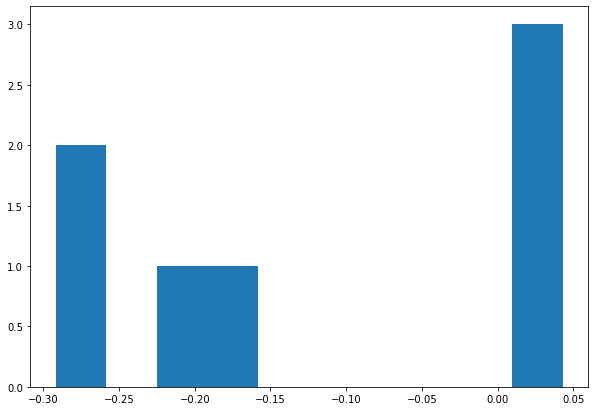

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tx)
 
# Show plot
plt.show()

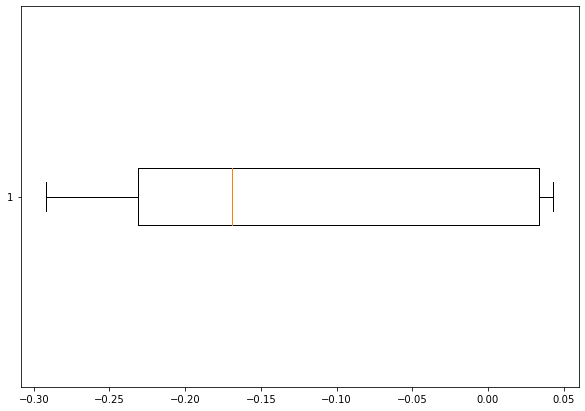

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(tx,vert=False)
 
# show plot
plt.show()

In [ ]:
#Mahalanobis Distance Method using FastMCD Algorithm is another option for multivariate anomaly detection

In [ ]:
mx_train=X_train

In [ ]:
from mpl_toolkits import mplot3d
from sklearn import covariance
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(mx_train)
# Create column that shows anomaly status


EllipticEnvelope(contamination=0.0075, random_state=0)

In [ ]:
etest=wtest
etest['Anomaly or Not'] = el.predict(etest)

,feature_1,feature_2,feature_3,Anomaly or Not
0,100,312,52.0,-1
1,100,160,1.6,1


In [ ]:
etest.head(3)

,feature_1,feature_2,feature_3,Anomaly or Not
0,100,312,52.00,-1
1,100,160,1.60,1
2,20,83,4.15,1


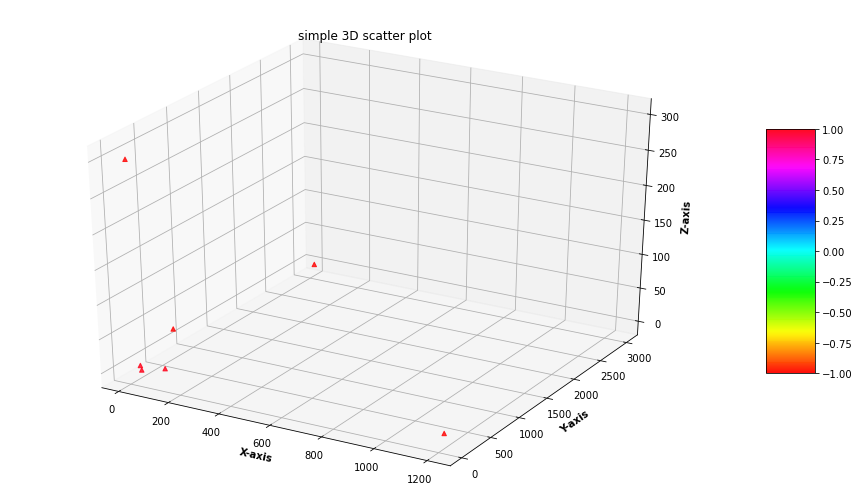

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


x = etest['feature_1']
y = etest['feature_2']
z = etest['feature_3']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.ylabel('Var 3')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = etest['Anomaly or Not'],
					cmap = my_cmap,
					marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()


In [ ]:
summarydf=pd.DataFrame()

In [ ]:
summarydf['anomaly_score']=list(anomaly_score)
summarydf['scores']=list(scores)
summarydf

,anomaly_score,scores
0,-1,-0.291981
1,1,0.033216
2,1,0.034675
3,-1,-0.195971
4,1,0.043119
5,-1,-0.266879
6,-1,-0.168807


In [ ]:
summarydf.drop('scores',axis=1,inplace=True)

In [ ]:
'''
for i in range(len(summarydf)):
    if (summarydf.anomaly_score[i]==-1):
        summarydf.anomaly_score[i]=1
    else:
        summarydf.anomaly_score[i]=0
'''

'\nfor i in range(len(summarydf)):\n    if (summarydf.anomaly_score[i]==-1):\n        summarydf.anomaly_score[i]=1\n    else:\n        summarydf.anomaly_score[i]=0\n'

In [ ]:
summarydf=summarydf.rename({'anomaly_score':'IF_anomaly'},axis=1)

In [ ]:
cmisow = confusion_matrix(summarydf.anomaly_score, wy_test)
tnw, fpw, fnw, tpw = cmisow.ravel()
fprw=fpw/(tnw+fpw)
fprw

0.0

In [ ]:
cmisow

array([[3, 0],
       [0, 4]])

In [ ]:
# Merging dataframes

In [ ]:
etest.drop(['feature_1','feature_2','feature_3'],axis=1,inplace=True)

In [ ]:
etest=etest.rename({'Anomaly or Not':'EE_anomaly'},axis=1)

In [ ]:
atest=wy_test.to_frame()
atest=atest.rename({'Actual_Class':'actual_anomaly'},axis=1)

In [ ]:
print('Comparing Anomalies')
print('A:I:E')
for i in range(7):
    print(str(atest.actual_anomaly[i])+':'+str(summarydf.IF_anomaly[i])+':'+str(etest.EE_anomaly[i]))

Comparing Anomalies
A:I:E
1:-1:-1
0:1:1
0:1:1
1:-1:-1
0:1:1
1:-1:-1
1:-1:-1


In [ ]:
#outlier detection

In [ ]:
tw = pd.read_csv("wdata/timerwtestactual.csv")
tw.drop(['timestamp','Actual_Class'],axis=1,inplace=True)
tw.head(2)

,feature_1,feature_2,feature_3
0,100,312,52.0
1,100,160,1.6


In [ ]:
# Z score
from scipy import stats
import numpy as np

z1 = np.abs(stats.zscore(tw['feature_1']))
z2 = np.abs(stats.zscore(tw['feature_2']))
z3 = np.abs(stats.zscore(tw['feature_3']))

In [ ]:
zt=np.hstack(( z1,z2,z3 )).ravel()
zt

array([2.79833431e-01, 2.79833431e-01, 4.77695454e-01, 2.44076937e+00,
       4.38123049e-01, 4.82642004e-01, 4.82642004e-01, 2.15341710e-01,
       3.65488223e-01, 4.41549286e-01, 4.34634644e-01, 4.83037138e-01,
       4.99829840e-01, 2.43988084e+00, 1.54475945e-03, 4.88908024e-01,
       4.64093448e-01, 4.85015541e-01, 4.93396056e-01, 2.41488385e+00,
       4.85015541e-01])

In [ ]:
print(np.where(zt>3))

(array([], dtype=int64),)


## XGB regressor

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [ ]:
y=X_train['feature_2']
X=X_train
X=X.drop('feature_2',axis=1,inplace=True)

In [ ]:
modelx = XGBRegressor()
modelx.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
tws=tw[['feature_1','feature_3']]
tws.head(2)

,feature_1,feature_3
0,100,52.0
1,100,1.6


In [ ]:
yhat = modelx.predict(tws)

In [ ]:
regpred=pd.DataFrame(yhat, columns=['feature_2']) 

In [ ]:
regpred['feature_2']=(round(regpred['feature_2'],0)).astype(int)

In [ ]:
tw.drop(['feature_1','feature_3'],axis=1,inplace=True)

In [ ]:
print('Comparing Predictions')
print('A:P')
for i in range(7):
    print(str(tw.feature_2[i])+':'+str(regpred.feature_2[i]))

Comparing Predictions
A:P
312:530
160:161
83:83
90:528
41:39
24:648
3000:22


## TS

In [ ]:
import fbprophet
from fbprophet import Prophet

In [ ]:
fw = pd.read_csv('wdata/wafern3_worked.csv')
fw.head(1)

,timestamp,feature_1,feature_2,feature_3
0,2019-01-01T00:00:04Z,100,160,1.6


In [ ]:
fw['y'] = fw['feature_2']
fw['ds']=pd.to_datetime(fw['timestamp'])
fw.head(2)

,timestamp,feature_1,feature_2,feature_3,y,ds
0,2019-01-01T00:00:04Z,100,160,1.60,160,2019-01-01 00:00:04+00:00
1,2019-01-01T00:01:01Z,20,83,4.15,83,2019-01-01 00:01:01+00:00


In [ ]:
fw.ds[0]

Timestamp('2019-01-01 00:00:04+0000', tz='UTC')

In [ ]:
fw['ds']=fw['ds'].apply(lambda x: x.replace(tzinfo=None))

In [ ]:
data_subset_ph=fw.head(2000)
test_subset_ph=fw.tail(519)

In [ ]:
#Define model and fit to training data and return the forecast of the vehicle volume for the testing data
def return_forecast(prophet_model, training_data, testing_data_range):
    prophet_model.fit(training_data)
    forecast_data = prophet_model.predict(testing_data_range)
    return forecast_data

In [ ]:
prophet = Prophet()
prophet_forecast = return_forecast(prophet, data_subset_ph, test_subset_ph )

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02 09:20:05,127.383686,-46.600989,287.267247
1,2019-01-02 09:21:06,127.384485,-46.673524,291.294105
2,2019-01-02 09:22:06,127.385272,-39.872353,300.425039
3,2019-01-02 09:23:07,127.386072,-44.292396,292.295119
4,2019-01-02 09:24:03,127.386806,-48.995434,306.527844


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def model_evaluation(actual_dataset, forecast_dataset, title):    
    plt.figure(figsize=(30, 7))
    plt.plot(actual_dataset['ds'], actual_dataset['y'], c= 'red', label = 'actual')
    plt.plot(forecast_dataset['ds'], forecast_dataset['yhat'], c= 'blue', label = 'predicted')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()
    mae = mean_absolute_error(actual_dataset['y'], forecast_dataset['yhat'])
    rmse = np.sqrt(mean_squared_error(actual_dataset['y'], forecast_dataset['yhat']))
    mape = mean_absolute_percentage_error(actual_dataset['y'], forecast_dataset['yhat'])
    print('Model Performance')
    print('Test Mean Absolute Error:', mean_absolute_error(actual_dataset['y'], forecast_dataset['yhat']))
    print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(actual_dataset['y'], forecast_dataset['yhat'])))
    print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(actual_dataset['y'], forecast_dataset['yhat']))
    return mae, rmse, mape

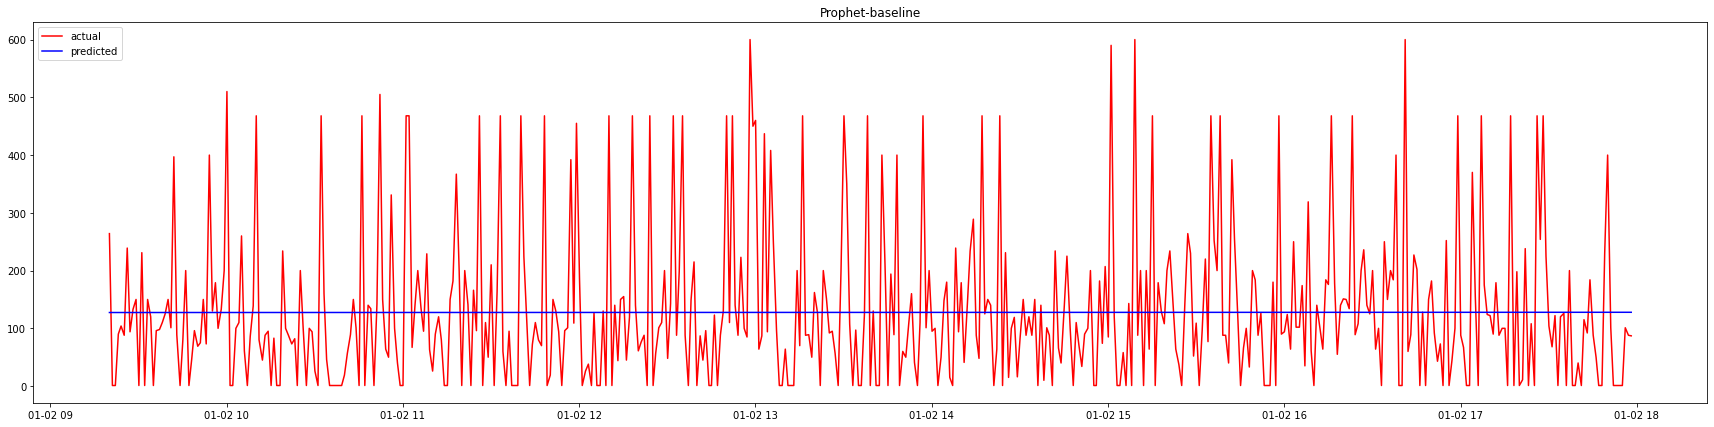

Model Performance
Test Mean Absolute Error: 97.28878590182002
Test Root Mean Squared Error: 134.61424637232042
Test Mean Absolute percentage Error: nan


In [ ]:
mae_ph, rmse_ph, mape_ph = model_evaluation(test_subset_ph, prophet_forecast, 'Prophet-baseline')